In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\DL_LAB_EXAM\DL_LAB_EXAM\Datasets\A_Z Handwritten Data.csv")
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Step 2: Features and labels
X = df.drop('0', axis=1).values  # Pixel values
y = df['0'].values               # Labels

In [7]:
# Step 3: Label Encoding (0-25 for A-Z)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: Feature Scaling (Standard Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [8]:
# Step 6: One-hot encode the labels for classification
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=26)
y_test_cat = to_categorical(y_test, num_classes=26)

In [11]:
# Step 7: Build a simple DNN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # 26 classes (A-Z)
])

# Step 8: Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Step 9: Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test, y_test_cat))

Epoch 1/10
9312/9312 [==============================] - 48s 5ms/step - loss: 0.3637 - accuracy: 0.9030 - val_loss: 0.1760 - val_accuracy: 0.9527
Epoch 2/10
9312/9312 [==============================] - 40s 4ms/step - loss: 0.1415 - accuracy: 0.9624 - val_loss: 0.1229 - val_accuracy: 0.9659
Epoch 3/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.0990 - accuracy: 0.9732 - val_loss: 0.1030 - val_accuracy: 0.9727
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0765 - accuracy: 0.9794 - val_loss: 0.0930 - val_accuracy: 0.9765
Epoch 5/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0626 - accuracy: 0.9832 - val_loss: 0.0858 - val_accuracy: 0.9789
Epoch 6/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.0514 - accuracy: 0.9865 - val_loss: 0.0763 - val_accuracy: 0.9812
Epoch 7/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.0427 - accuracy: 0.9892 - val_loss: 0.0774 - val_ac

In [13]:
# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

2328/2328 [==============================] - 7s 3ms/step - loss: 0.0767 - accuracy: 0.9858
Test Accuracy: 0.9858


In [14]:
# 8. Predictions and Evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)

2328/2328 [==============================] - 5s 2ms/step


In [16]:
import string
class_names = list(string.ascii_uppercase)

In [17]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

           A       0.98      0.98      0.98      2806
           B       0.98      0.98      0.98      1673
           C       0.99      0.99      0.99      4742
           D       0.99      0.94      0.96      2044
           E       0.99      0.98      0.98      2214
           F       0.99      0.95      0.97       231
           G       0.98      0.97      0.98      1183
           H       0.98      0.95      0.96      1466
           I       0.99      0.96      0.97       237
           J       0.98      0.97      0.98      1668
           K       0.97      0.95      0.96      1132
           L       0.99      0.99      0.99      2319
           M       0.98      0.98      0.98      2487
           N       0.97      0.99      0.98      3756
           O       0.99      1.00      0.99     11629
           P       0.99      0.99      0.99      3868
           Q       0.97      0.97      0.97      1159
   

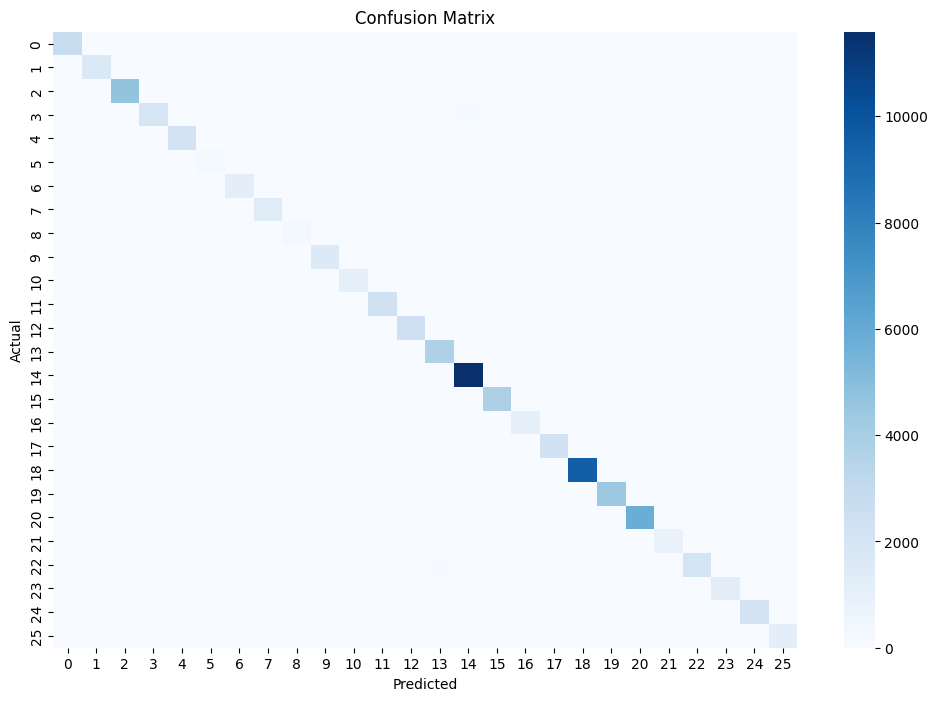

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

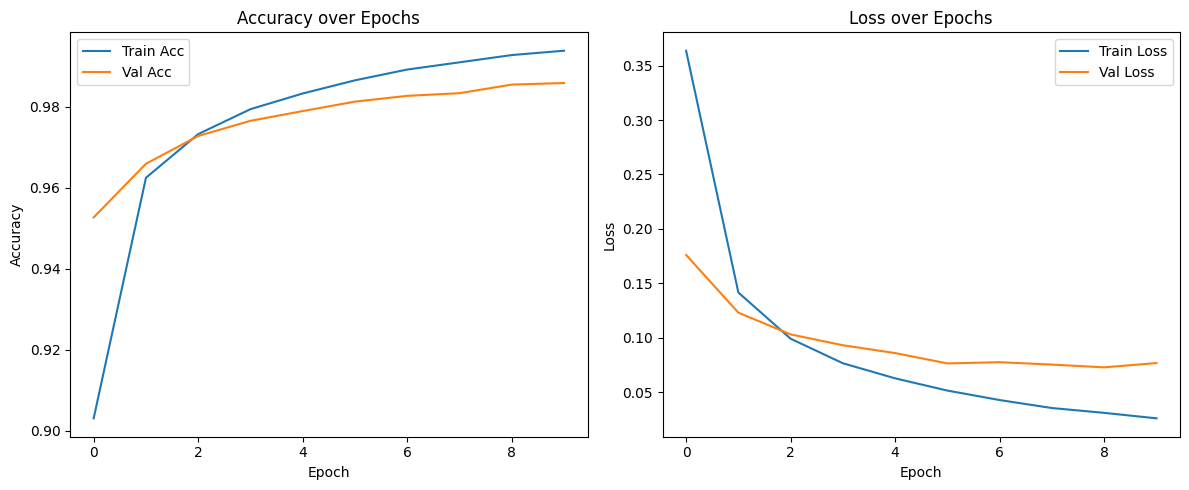

In [19]:
# 9. Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

2328/2328 [==============================] - 5s 2ms/step


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9648\349725520.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', n_classes)


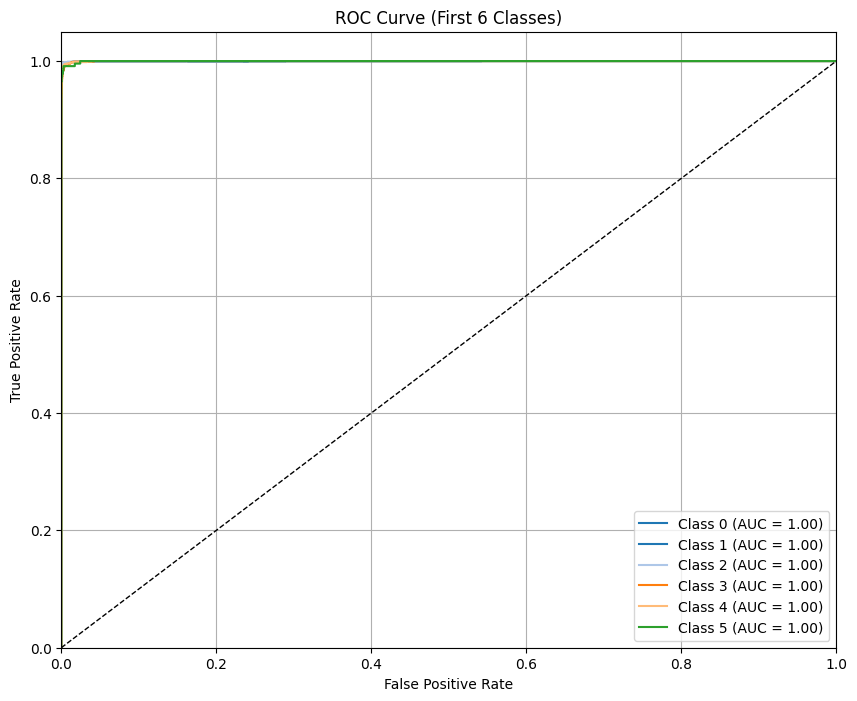

In [20]:
# ROC Curve for Multiclass
n_classes = 26
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = model.predict(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for first 6 classes (just for clarity; can do all if desired)
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab20', n_classes)

for i in range(6):  # Change to range(n_classes) to plot all 26
    plt.plot(fpr[i], tpr[i],
             label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})',
             color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (First 6 Classes)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()